Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Your project looks pretty good! 
* I'm impressed with code formatting in your project. 
* Great that you've mastered the hypothesis testing technique!
* There are some comments for improvement. They don't mean that you did anything wrong, but they're things we wanted to point out that can help you further develop your skills. 
* Your project has passed code-review. Congratulations!
* You're on the right track. Good luck next!

### Import data files

In [2]:
!pip install squarify
import squarify
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

company_name_trips_amount = pd.read_csv('/datasets/project_sql_result_01.csv')

dropoff_location_avg_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

### Study data

In [3]:
#display(company_name_trips_amount)
company_name_trips_amount.info()

#display(dropoff_location_avg_trips)
dropoff_location_avg_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


The company_name_trips_amount table contains the company_name and trips_amount, which is the number of rides for each taxi company on November 15-16, 2017. It has 64 rows of taxi companies.

The dropoff_location_avg_trips table contains the names of the Chicago neighborhoods where dropoffs occured and the average number of rides that ended in each of these Chicago neighborhoods in November 2017. 

### Pre-process data

In [4]:
# company_name_trips_amount table

# Change company_name to string
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].astype(str)

# Drop duplicates
company_name_trips_amount.drop_duplicates(inplace=True)

# Drop rows with null
company_name_trips_amount.dropna(inplace=True)

# Remove unneccessary numbers and - from the name
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].str.replace('\d+ - (\d+)* -*', '')
company_name_trips_amount['company_name'] = company_name_trips_amount['company_name'].str.replace('\d+ - ', '')

To process the company_name_trips_amount table, I casted the company_name column to the string type. Then, I dropped any possible duplicates or NA rows. I found that there were many taxi companies with a '1234 - 1234' before the name of the actual company, so I wrote a regular expression to filter out unnecessary numbers and symbols from the name of the taxi company. 

In [5]:
# v table

# Change dropoff_location_name to string
dropoff_location_avg_trips['dropoff_location_name'] = dropoff_location_avg_trips['dropoff_location_name'].astype(str)

# Drop duplicates
dropoff_location_avg_trips.drop_duplicates(inplace=True)

# Drop rows with null
dropoff_location_avg_trips.dropna(inplace=True)

To process the dropoff_location_avg_trips table, I casted the dropoff_location)name column to the string type. Then, I dropped any possible duplicates or NA rows. I didn't find anything strange with the raw data. 

<div class="alert alert-block alert-success">
<b>Success:</b> The first step was done well!
</div>

### Identify the top 10 neighborhoods by number of dropoffs (Nov 2017)

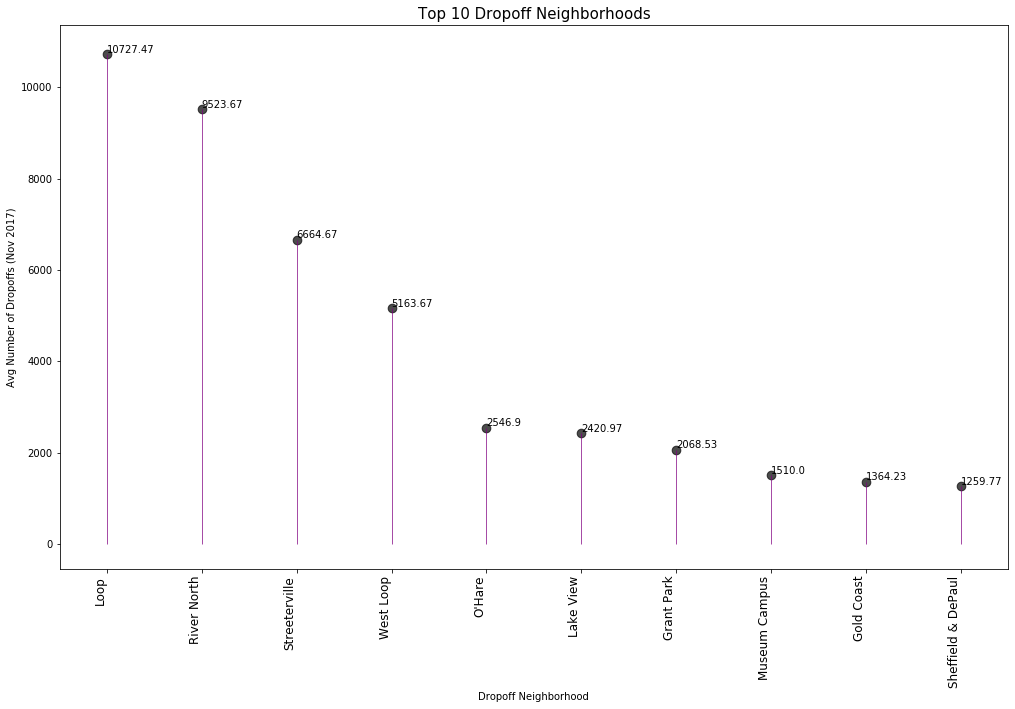

In [6]:
top10dropoffs = dropoff_location_avg_trips.sort_values(by='average_trips',ascending=False).round(decimals=2).head(10)

fig, ax = plt.subplots(figsize=(17,10))
ax.vlines(x=top10dropoffs.dropoff_location_name, ymin=0, ymax=top10dropoffs.average_trips,color='purple',alpha=0.7,linewidth=1)
ax.scatter(x=top10dropoffs.dropoff_location_name,y=top10dropoffs.average_trips, s=75, color='black',alpha=0.7)

ax.set_title("Top 10 Dropoff Neighborhoods", fontdict={'size':15})
ax.set_ylabel('Avg Number of Dropoffs (Nov 2017)')
ax.set_xlabel('Dropoff Neighborhood')
ax.set_xticks(top10dropoffs.dropoff_location_name)
ax.set_xticklabels(top10dropoffs.dropoff_location_name, rotation=90, fontdict={'horizontalalignment':'right','size':12})
for row in top10dropoffs.itertuples():
    ax.text(row.dropoff_location_name, row.average_trips+30,s=round(row.average_trips,2))

To idenfity the top 10 dropoff neighborhoods in Nov 2017, I sorted the dropoff_location_avg_trips table by the average_trips column, rounded the average number to the 2nd decimal point and selected only the top 10 neighborhoods. 

<div class="alert alert-block alert-success">
<b>Success:</b> Wow! This chart is perfect! Glad to see that axis and graph were named.
</div>

### Taxi Companies and number of rides (Nov 15-16, 2017)

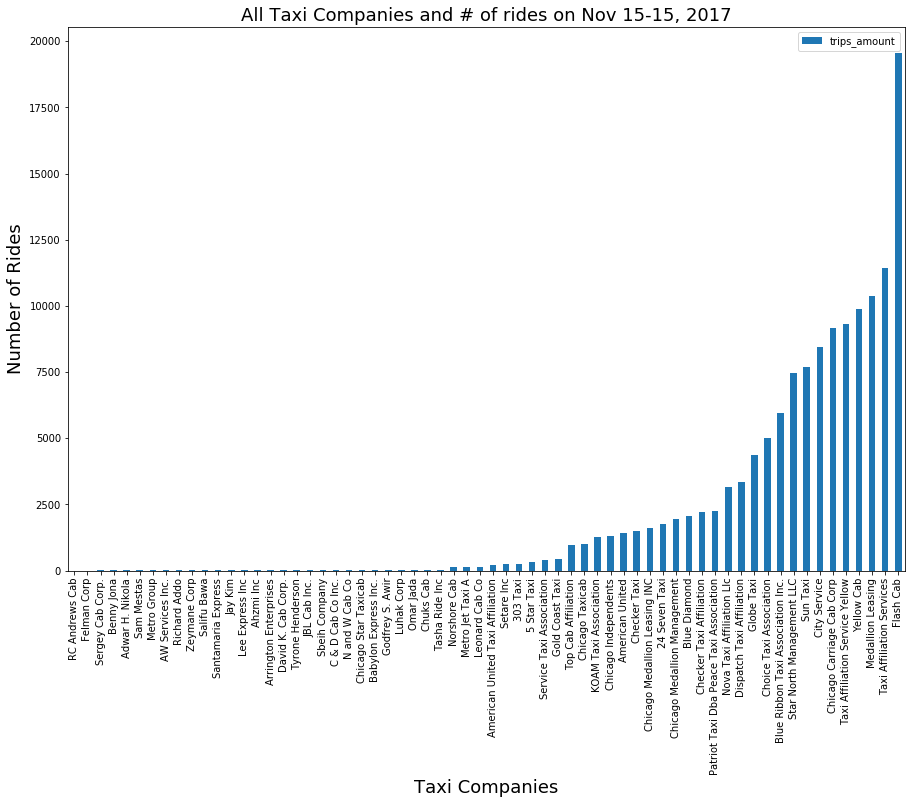

In [31]:
# Plot all taxi companies

plotData = company_name_trips_amount.sort_values(by='trips_amount')
ax = plotData.plot(kind='bar', x='company_name', y='trips_amount',figsize=(15,10))

ax.set_title("All Taxi Companies and # of rides on Nov 15-15, 2017", fontsize=18)
ax.set_ylabel("Number of Rides", fontsize=18);
ax.set_xlabel("Taxi Companies", fontsize=18);

Text(0.5, 1.0, 'Distribution of Platform Market')

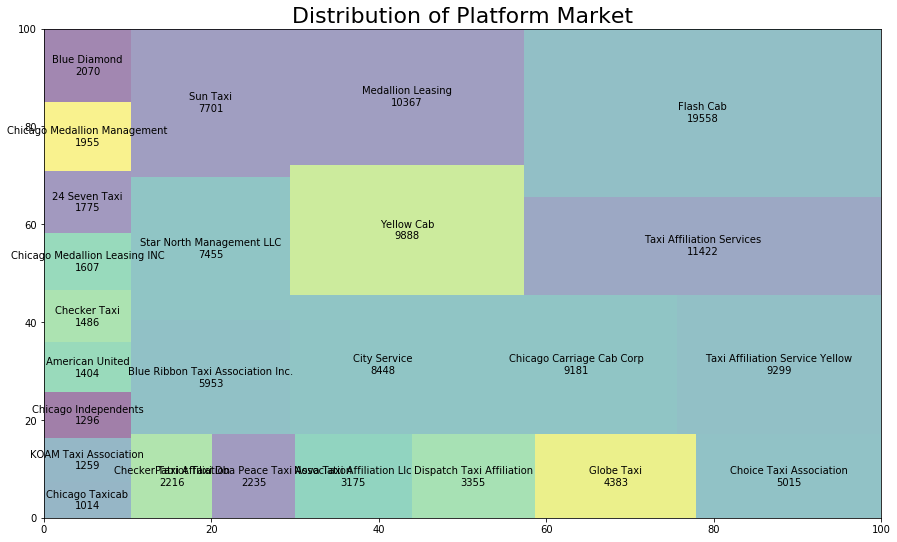

In [7]:
# Plot only the top taxi companies
plotData = company_name_trips_amount.sort_values(by='trips_amount')
plotData = plotData[plotData['trips_amount'] > 1000] # Only taxi companies with > 1000 rides in a 1 day period
sizes = plotData.trips_amount.values.tolist()
labels = plotData.apply(lambda x: str(x[0]) + "\n" + str(round(x[1])),axis=1)
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes,label=labels,alpha=0.5)

plt.title('Distribution of Platform Market', fontsize=22)

To graph the taxi companies and the number of rides they had in the period of Nov 15-16, 2017, I sorted the company_name_trips_amount table by trips_amounts and cut off any taxi company who had less than 1000 rides in the 1 day period. 

<div class="alert alert-block alert-info">
<b>Improve: </b> The best solution here is to use horizontal bar plot with all companies.
</div>

### Test whether the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays

In [69]:
# import query data
loop_airport_rides = pd.read_csv('/datasets/project_sql_result_07.csv')

# drop Nans
loop_airport_rides = loop_airport_rides.dropna()

# rainy Saturday data (180 rows)
rainy_rides = loop_airport_rides[loop_airport_rides['weather_conditions'] == 'Bad']

# calculate average duration of rainy Saturday rides
avgRainyRideDuration = rainy_rides['duration_seconds'].mean()
avgRainyRideDuration = (avgRainyRideDuration/60).round(decimals=2)
print('The average duration of rainy Saturday rides is: ' + str(avgRainyRideDuration) + " minutes")

# non-rainy Saturday data (888 rows)
nonrainy_rides = loop_airport_rides[loop_airport_rides['weather_conditions'] == 'Good']

# calculate average duration of non rainy Saturday rides
avgNonRainyRideDuration = nonrainy_rides['duration_seconds'].mean()
avgNonRainyRideDuration = (avgNonRainyRideDuration/60).round(decimals=2)
print('The average duration of non-rainy Saturday rides is: ' + str(avgNonRainyRideDuration) + " minutes")

# perform a t-test
results = st.ttest_ind(rainy_rides['duration_seconds'], nonrainy_rides['duration_seconds'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print('Reject H0')
else:
    print('Cannot reject H0')

The average duration of rainy Saturday rides is: 40.45 minutes
The average duration of non-rainy Saturday rides is: 33.33 minutes
Reject H0


We want to test the hypothesis that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. The imported data file provides us with trip logs (start datetime, weather condition, duration of ride in seconds) for Saturdays in November of 2017. We can test the hypothesis using an independent samples t-test to compare the average duration of the ride (in seconds) from the two groups (good weather conditions and bad weather conditions). We can apply a t-test here due to the Central Limit Theorem, which implies that you can estimate the mean of a statistical population usin the mean of a sample. Since the means are approximately normally distributed - we can use the t-test. 

Null Hypothesis H0: The average duration of rides from the Loop to O'Hare Airport is the same on rainy Saturdays as it is on non-rainy Saturdays. 
Alternative Hypothesis H1: The average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Saturdays. 

The p_value suggests that we should reject the null hypothesis, thus indicating that the average duration of rides from the Loop to O'Hare Airport differs on rainy Saturdays from non-rainy Satudays. This means that the sample results have a rare outcome and therefore it is very unlikely that it's just a lucky significance. This can be further proven by looking at the numbers: the average duration of rainy Saturday rides is 40.45 minutes, while the average duration of non-rainy Saturday rides is 33.33 minutes. This 7 minute difference between rainy and non-rainy days can be enough to miss a flight!

<div class="alert alert-block alert-success">
<b>Success:</b> Both null and alternative hypotheses were formulated correctly. Testing was done in the right way too.
    <br> Great that means were printed!
</div>